# GMC stock Prediction Model

In [1]:


import os
import pandas as pd
import numpy as np
import math
import datetime as dt


from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


#  Loading Dataset

In [3]:
data=pd.read_csv('gmcstock.csv')

In [4]:
print('Total number of days present in the dataset: ',data.shape[0])
print('Total number of fields present in the dataset: ',data.shape[1])

Total number of days present in the dataset:  1701
Total number of fields present in the dataset:  7


In [5]:
data.shape

(1701, 7)

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-10-25,24.855000,24.855000,24.855000,24.855000,21.272076,400
1,2016-10-26,24.625000,24.625000,24.625000,24.625000,21.075230,400
2,2016-10-27,24.625000,24.625000,24.625000,24.625000,21.075230,0
3,2016-10-28,24.625000,24.625000,24.625000,24.625000,21.075230,0
4,2016-10-31,25.202499,25.202499,25.202499,25.202499,21.569481,45200


In [7]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1696,2023-08-17,41.049999,41.450001,40.900002,41.049999,41.049999,348
1697,2023-08-18,40.849998,41.220001,40.750000,41.130001,41.130001,345
1698,2023-08-21,41.270000,41.680000,41.119999,41.650002,41.650002,595
1699,2023-08-22,41.549999,41.549999,40.529999,41.040001,41.040001,554
1700,2023-08-23,40.740002,41.660000,40.290001,41.660000,41.660000,1489


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1701 non-null   object 
 1   Open       1701 non-null   float64
 2   High       1701 non-null   float64
 3   Low        1701 non-null   float64
 4   Close      1701 non-null   float64
 5   Adj Close  1701 non-null   float64
 6   Volume     1701 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 93.2+ KB


In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1.701000e+03
mean,44.350672,44.743495,43.916789,44.333714,42.805008,1.231265e+04
std,15.913020,16.345173,15.410093,15.895785,16.629802,4.246344e+04
min,21.502501,21.502501,21.502501,21.502501,21.075230,0.000000e+00
25%,34.070000,34.099998,34.070000,34.070000,31.515652,0.000000e+00
50%,38.372501,38.372501,38.372501,38.372501,36.665302,1.200000e+03
75%,50.250000,50.799999,49.200001,50.000000,49.628601,9.728000e+03
max,92.959999,94.349998,89.449997,92.959999,92.085335,1.148809e+06


# Checking for Null Values

In [10]:
print('Null Values:',data.isnull().values.sum())

Null Values: 0


In [11]:
print('NA values:',data.isnull().values.any())

NA values: False


In [12]:

data.shape

(1701, 7)

#  Exploratory Data Analysis

In [13]:

sd=data.iloc[0][0]
ed=data.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2016-10-25
Ending Date 2023-08-23


#### GMC data Analysis from Start

# Analysis of Year 2017

In [14]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

y_2017 = data.loc[(data['Date'] >= '2017-01-01')
                     & (data['Date'] < '2018-01-01')]

y_2017.drop(y_2017[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
46,2017-01-02,29.047501,29.047501,29.047501,29.047501
47,2017-01-03,29.047501,29.047501,29.047501,29.047501
48,2017-01-04,29.047501,29.047501,29.047501,29.047501
49,2017-01-05,29.047501,29.047501,29.047501,29.047501
50,2017-01-06,29.047501,29.047501,29.047501,29.047501
...,...,...,...,...,...
295,2017-12-25,35.224998,35.224998,35.224998,35.224998
296,2017-12-26,35.224998,35.224998,35.224998,35.224998
297,2017-12-27,35.224998,35.224998,35.224998,35.224998
298,2017-12-28,34.174999,34.174999,34.174999,34.174999


In [15]:
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,29.328929,29.328929
February,28.281250,28.281250
March,28.069456,28.069456
April,26.592639,26.592639
May,27.346818,27.351023
June,28.199659,28.199659
July,28.875000,28.875000
August,27.684674,27.684674
September,29.865357,29.865357


In [16]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between stock open and close price')
fig.show()

In [17]:
y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2017.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low GMC Stock price')
fig.show()

In [18]:
names = cycle(['stock Open Price','stock Close Price','stock High Price','stock Low Price'])

fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Open'], y_2017['Close'], 
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Date','value':'stock value'})
fig.update_layout(title_text='stock analysis chart', font_size=15, font_color='black',legend_title_text='stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2018

In [19]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

y_2018 = data.loc[(data['Date'] >= '2018-01-01')
                     & (data['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
300,2018-01-02,34.174999,34.174999,34.174999,34.174999
301,2018-01-03,34.174999,34.174999,34.174999,34.174999
302,2018-01-04,35.549999,35.654999,35.549999,35.654999
303,2018-01-05,35.474998,35.474998,35.474998,35.474998
304,2018-01-08,36.132500,36.132500,36.125000,36.125000
...,...,...,...,...,...
541,2018-12-20,33.799999,33.799999,33.799999,33.799999
542,2018-12-21,33.799999,33.799999,33.799999,33.799999
543,2018-12-26,33.799999,33.799999,33.799999,33.799999
544,2018-12-27,33.799999,33.799999,33.799999,33.799999


In [20]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,35.093181,35.076136
February,33.536944,33.545833
March,30.634286,30.614524
April,32.343214,32.424643
May,33.760595,33.766547
June,40.704404,40.740118
July,37.844880,37.844880
August,36.043805,36.043805
September,35.576578,35.576578


In [21]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between stock open and close price')
fig.show()


In [22]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [23]:
names = cycle(['stock Open Price','stock Close Price','stock High Price','stock Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'], 
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'stock value'})
fig.update_layout(title_text='stock analysis chart', font_size=15, font_color='black',legend_title_text='stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2019

In [24]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

y_2019 = data.loc[(data['Date'] >= '2019-01-01')
                     & (data['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
546,2019-01-02,33.799999,33.799999,33.799999,33.799999
547,2019-01-03,30.504999,30.504999,30.325001,30.325001
548,2019-01-04,30.325001,30.325001,30.325001,30.325001
549,2019-01-07,30.325001,30.325001,30.325001,30.325001
550,2019-01-08,30.325001,30.325001,30.325001,30.325001
...,...,...,...,...,...
789,2019-12-20,36.937500,36.937500,36.937500,36.937500
790,2019-12-23,37.422501,37.422501,37.422501,37.422501
791,2019-12-26,37.422501,37.422501,37.422501,37.422501
792,2019-12-27,37.422501,37.422501,37.422501,37.422501


In [25]:
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,33.389762,33.384524
February,35.627500,35.627500
March,36.188816,36.188816
April,38.009881,38.009881
May,37.158977,37.170000
June,34.872894,34.889868
July,37.307841,37.311704
August,37.961591,37.929886
September,39.484168,39.484168


In [26]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between stock open and close price')
fig.show()

In [27]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [28]:
names = cycle(['stock Open Price','stock Close Price','stock High Price','stock Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'], 
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'stock value'})
fig.update_layout(title_text='stock analysis chart', font_size=15, font_color='black',legend_title_text='stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2020

In [29]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

y_2020 = data.loc[(data['Date'] >= '2020-01-01')
                     & (data['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
794,2020-01-02,37.422501,37.422501,37.422501,37.422501
795,2020-01-03,36.529999,36.529999,36.529999,36.529999
796,2020-01-06,36.517502,36.517502,36.517502,36.517502
797,2020-01-07,35.400002,35.400002,35.400002,35.400002
798,2020-01-08,35.322498,35.322498,35.322498,35.322498
...,...,...,...,...,...
1037,2020-12-22,53.709999,53.709999,52.430000,52.900002
1038,2020-12-23,52.900002,55.849998,52.900002,55.500000
1039,2020-12-28,55.500000,55.810001,54.740002,54.860001
1040,2020-12-29,55.880001,57.000000,53.770000,54.240002


In [30]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,35.767728,35.767728
February,36.781805,36.781805
March,29.127500,29.142159
April,26.988000,26.988000
May,33.521750,33.535500
June,35.342500,35.294643
July,33.828152,33.812717
August,38.800834,38.866309
September,41.008571,40.980357


In [31]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between stock open and close price')
fig.show()

In [32]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [33]:
names = cycle(['stock Open Price','stock Close Price','stock High Price','stock Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'], 
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'stock value'})
fig.update_layout(title_text='stock analysis chart', font_size=15, font_color='black',legend_title_text='stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2021

In [34]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

y_2021 = data.loc[(data['Date'] >= '2021-01-01')
                     & (data['Date'] < '2021-12-31')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1042,2021-01-04,55.000000,55.000000,52.700001,54.799999
1043,2021-01-05,54.639999,55.250000,53.470001,55.049999
1044,2021-01-06,55.490002,57.799999,55.320000,56.900002
1045,2021-01-07,58.009998,58.790001,57.709999,58.000000
1046,2021-01-08,58.430000,58.430000,57.360001,58.250000
...,...,...,...,...,...
1284,2021-12-23,79.610001,80.870003,79.459999,80.809998
1285,2021-12-27,80.809998,81.449997,80.180000,80.800003
1286,2021-12-28,81.309998,81.459999,80.389999,80.389999
1287,2021-12-29,80.760002,82.000000,80.330002,82.000000


In [35]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,65.338948,65.576842
February,71.978334,72.086111
March,79.379130,79.852608
April,82.210501,81.821500
May,75.640000,75.647619
June,76.716666,76.258571
July,73.411904,73.447143
August,68.799999,68.428636
September,66.747619,66.925714


#### Since we had data till 24-08-2021 in Months after August its showing NaN

In [36]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between stock open and close price')
fig.show()

In [37]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [38]:
names = cycle(['stock Open Price','stock Close Price','stock High Price','stock Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'], 
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'stock value'})
fig.update_layout(title_text='stock analysis chart', font_size=15, font_color='black',legend_title_text='stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2022

In [39]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

y_2022 = data.loc[(data['Date'] >= '2022-01-01')
                     & (data['Date'] < '2022-02-19')]



In [40]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,80.793810,80.644286
February,66.699999,66.357142
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,NaN,NaN


In [41]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between stock open and close price')
fig.show()

In [42]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [43]:
names = cycle(['stock Open Price','stock Close Price','stock High Price','stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'], 
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'stock value'})
fig.update_layout(title_text='stock analysis chart', font_size=15, font_color='black',legend_title_text='stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2023

In [44]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

y_2023 = data.loc[(data['Date'] >= '2023-01-01')
                     & (data['Date'] < '2023-08-23')]



In [45]:
monthvise= y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,46.903637,47.048182
February,53.073333,53.166111
March,47.559130,47.290435
April,43.509444,43.159444
May,40.965455,40.884091
June,44.281905,44.402381
July,47.130953,47.000476
August,43.253749,42.958125
September,NaN,NaN


In [46]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between stock open and close price')
fig.show()

In [47]:
y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2023.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [48]:
y_2023.Date

1539   2023-01-02
1540   2023-01-03
1541   2023-01-04
1542   2023-01-05
1543   2023-01-06
          ...    
1695   2023-08-16
1696   2023-08-17
1697   2023-08-18
1698   2023-08-21
1699   2023-08-22
Name: Date, Length: 161, dtype: datetime64[ns]

In [49]:
names = cycle(['stock Open Price','stock Close Price','stock High Price','stock Low Price'])

fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'], 
                                          y_2023['High'], y_2023['Low']],
             labels={'Date': 'Date','value':'stock value'})
fig.update_layout(title_text='stock analysis chart', font_size=15, font_color='black',legend_title_text='stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Overall Analysis from 2017-2023

In [50]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

y_overall = data.loc[(data['Date'] >= '2017-09-17')
                     & (data['Date'] <= '2023-08-23')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
225,2017-09-18,30.355000,30.355000,30.355000,30.355000
226,2017-09-19,30.355000,30.355000,30.355000,30.355000
227,2017-09-20,30.355000,30.355000,30.355000,30.355000
228,2017-09-21,30.355000,30.355000,30.355000,30.355000
229,2017-09-22,30.355000,30.355000,30.355000,30.355000
...,...,...,...,...,...
1696,2023-08-17,41.049999,41.450001,40.900002,41.049999
1697,2023-08-18,40.849998,41.220001,40.750000,41.130001
1698,2023-08-21,41.270000,41.680000,41.119999,41.650002
1699,2023-08-22,41.549999,41.549999,40.529999,41.040001


In [51]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,49.056024,49.088110
February,49.212860,49.186734
March,46.771635,46.761154
April,45.005000,44.865336
May,44.646680,44.654043
June,46.151371,46.091834
July,45.387228,45.419709
August,45.756719,45.689356
September,45.414845,45.404381


In [52]:
names = cycle(['stock Open Price','stock Close Price','stock High Price','stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'stock value'})
fig.update_layout(title_text='stock analysis chart', font_size=15, font_color='black',legend_title_text='stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [53]:
# Lets First Take all the Close Price 
closedf = data[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1701, 2)


In [54]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of stock close price 2014-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 1 Year

In [55]:
closedf = closedf[closedf['Date'] > '2022-08-23']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  250


In [56]:
closedf

,Date,Close
1451,2022-08-24,50.180000
1452,2022-08-25,51.430000
1453,2022-08-26,50.099998
1454,2022-08-29,50.599998
1455,2022-08-30,49.750000
...,...,...
1696,2023-08-17,41.049999
1697,2023-08-18,41.130001
1698,2023-08-21,41.650002
1699,2023-08-22,41.040001


In [57]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict stock close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

* ### Normalizing Data


In [58]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(250, 1)


* ### Slicing data into Training set and Testing set

In [59]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (150, 1)
test_data:  (100, 1)


* ### Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15   

In [60]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [61]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (134, 15)
y_train:  (134,)
X_test:  (84, 15)
y_test (84,)


In [62]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (134, 15, 1)
X_test:  (84, 15, 1)


* # Actuall Model Building

In [63]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [64]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
5/5 [==============================] - 4s 169ms/step - loss: 0.3564 - val_loss: 0.0763
Epoch 2/200
5/5 [==============================] - 0s 26ms/step - loss: 0.3063 - val_loss: 0.0618
Epoch 3/200
5/5 [==============================] - 0s 28ms/step - loss: 0.2618 - val_loss: 0.0492
Epoch 4/200
5/5 [==============================] - 0s 26ms/step - loss: 0.2206 - val_loss: 0.0384
Epoch 5/200
5/5 [==============================] - 0s 29ms/step - loss: 0.1830 - val_loss: 0.0292
Epoch 6/200
5/5 [==============================] - 0s 27ms/step - loss: 0.1485 - val_loss: 0.0216
Epoch 7/200
5/5 [==============================] - 0s 26ms/step - loss: 0.1166 - val_loss: 0.0159
Epoch 8/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0877 - val_loss: 0.0125
Epoch 9/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0625 - val_loss: 0.0117
Epoch 10/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0431 - val_loss: 0.0140
Epoch 11/200
5/5 [

Epoch 84/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0144 - val_loss: 0.0089
Epoch 85/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0144 - val_loss: 0.0088
Epoch 86/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0143 - val_loss: 0.0086
Epoch 87/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0142 - val_loss: 0.0085
Epoch 88/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0140 - val_loss: 0.0088
Epoch 89/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0138 - val_loss: 0.0091
Epoch 90/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0138 - val_loss: 0.0091
Epoch 91/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0137 - val_loss: 0.0091
Epoch 92/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0136 - val_loss: 0.0088
Epoch 93/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0134 - val_loss: 0.0084
Epoch 94/2

5/5 [==============================] - 0s 26ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 167/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 168/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0072 - val_loss: 0.0083
Epoch 169/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0073 - val_loss: 0.0088
Epoch 170/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0073 - val_loss: 0.0085
Epoch 171/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0072 - val_loss: 0.0077
Epoch 172/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0072 - val_loss: 0.0082
Epoch 173/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0071 - val_loss: 0.0089
Epoch 174/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0073 - val_loss: 0.0089
Epoch 175/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0072 - val_loss: 0.0084
Epoch 176/200


- ### Plotting Loss vs Validation loss 

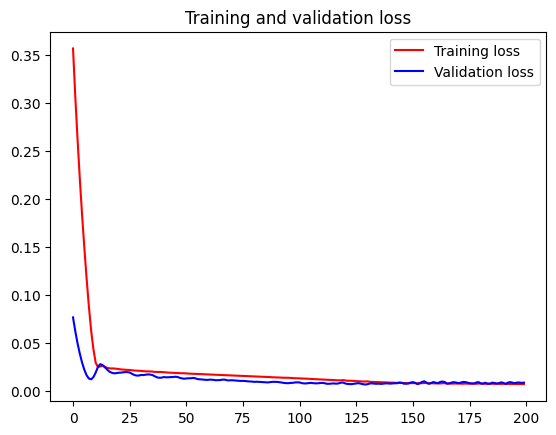

<Figure size 640x480 with 0 Axes>

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [66]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 6ms/step


((134, 1), (84, 1))

- # Model Evaluation

In [67]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## Evaluation metrices RMSE, MSE and MAE

In [68]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1.42800578602661
Train data MSE:  2.0392005249254765
Train data MAE:  1.1406756137731755
-------------------------------------------------------------------------------------
Test data RMSE:  1.5793100813907643
Test data MSE:  2.4942203331825024
Test data MAE:  1.3126210112479075


- ## Variance Regression Score

In [69]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8456597983997769
Test data explained variance regression score: 0.8607833218416012


- ## R square score for regression

In [70]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8456584891900844
Test data R2 score: 0.6456519354523106


- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [71]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0008655350560210511
Test data MGD:  0.001341754280333975
----------------------------------------------------------------------
Train data MPD:  0.041927380288823785
Test data MPD:  0.05779859919823763


- # Comparision of original stock close price and predicted close price

In [72]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (250, 1)
Test predicted data:  (250, 1)


- # Predicting next 30 days

In [73]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


- # Plotting last 15 days of dataset and next predicted 30 days

In [74]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [75]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.funnel(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



In [76]:
y_2023.Date

1539   2023-01-02
1540   2023-01-03
1541   2023-01-04
1542   2023-01-05
1543   2023-01-06
          ...    
1695   2023-08-16
1696   2023-08-17
1697   2023-08-18
1698   2023-08-21
1699   2023-08-22
Name: Date, Length: 161, dtype: datetime64[ns]